In [185]:
import pandas as pd
import pickle

In [186]:
# Carregar o modelo treinado em outro código
with open('./models/modelo_lgb_tfidf_unigram_ingles.pkl', 'rb') as file:
    modelo_lgb_tfidf_unigram = pickle.load(file)

In [187]:
# Carregar o vetorizador TF-IDF de volta a partir do arquivo usando o pickle
with open('./models/tfidf_vec_unigram_ingles.pkl', 'rb') as file:
    tfidf_vec_unigram = pickle.load(file)

/home/jupyter/Jupyter/notebook/lib/python3.8/site-packages/sklearn/base.py:324: UserWarning: Trying to unpickle estimator TfidfTransformer from version 1.1.2 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/jupyter/Jupyter/notebook/lib/python3.8/site-packages/sklearn/base.py:324: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 1.1.2 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [188]:
tfidf_vec_unigram

TfidfVectorizer(norm='l1')

In [ ]:
# Carregar arquivo
df_n = pd.read_excel('./totalData/darkweb/dataset_pre-processados.xlsx')

In [190]:
df_n

,id,forum,title,user,post,commentaries,dataCreated,full_text_ingles
0,1,Tech,NaN,ziq,NaN,"[{'id': 1, 'postId': 1, 'commentary': ""This is...",2017-05-07 13:48:45,cant nice things user calistoga votes z join f...
1,2,programming,Article (CW: racism): http://www.breitbart.com...,tlckl,Article (CW: racism): http://www.breitbart.com...,"[{'id': 4, 'postId': 2, 'commentary': ""That's ...",2017-05-11 12:06:00,article cw racism httpwwwbreitbartcomtech repo...
2,3,Privacy,"Hello! I'm the creator of this forum, MrRobot....",MrRobot,"Hello! I'm the creator of this forum, MrRobot....",None,2017-05-12 22:19:40,hello im creator forum mrrobot sorry linking b...
3,4,Tech,Just don't use Windows.,ziq,Just don't use Windows.,None,2017-05-13 10:08:05,dont use windows dont use windows
4,5,Tech,Who would have imagined?,const_cast,Who would have imagined?,None,2017-05-16 12:20:53,would imagined would imagined
...,...,...,...,...,...,...,...,...
845,846,Tech,Would have you said a fraction of the first ge...,ArgueVanquisher,Would have you said a fraction of the first ge...,"[{'id': 6658, 'postId': 846, 'commentary': ""I ...",2024-03-24 15:25:05,would said fraction first generation free deve...
846,847,programming,i've been working on some web programming proj...,martelo85,i've been working on some web programming proj...,"[{'id': 6669, 'postId': 847, 'commentary': 'sh...",2024-03-31 12:00:29,ive working web programming projects like know...
847,848,Tech,Take the first step and gain some practical ex...,MrPositive,Take the first step and gain some practical ex...,"[{'id': 6680, 'postId': 848, 'commentary': 'no...",2024-04-02 07:14:15,take first step gain practical experience cont...
848,849,Privacy,NotABug.org link that doesn't require JS,Rocket_Gecko,NotABug.org link that doesn't require JS,None,2024-04-03 10:26:22,notabugorg link doesnt require js notabugorg l...


In [191]:
####
# Coluna full_text (X_text_n)

X_text_n = df_n['full_text_ingles'].values.astype('U')
#X_text_n = df_n['full_text_ingles']

In [192]:
# Usar o vetorizador TF-IDF para transformar os novos textos em vetores TF-IDF - Unigram
X_tfidf_unigram_n = tfidf_vec_unigram.transform(X_text_n)

In [193]:
X_tfidf_unigram_n.shape

(850, 68480)

In [194]:
# Usar o modelo LightGBM e fazer previsões nos novos posts
prev = modelo_lgb_tfidf_unigram.predict(X_tfidf_unigram_n)

In [195]:
# Criar um novo DataFrame para armazenar as previsões
df_previsoes = pd.DataFrame({'full_text_X_tfidf_unigram_n': X_tfidf_unigram_n, 'previsoes': prev})

In [196]:
df_previsoes

,full_text_X_tfidf_unigram_n,previsoes
0,"(0, 68332)\t0.0006515499256488618\n (0, 678...",0.252811
1,"(0, 67348)\t0.00532772223734219\n (0, 67346...",0.012654
2,"(0, 61527)\t0.023338487219791763\n (0, 6145...",0.013529
3,"(0, 66964)\t0.3062960531142314\n (0, 64479)...",0.010245
4,"(0, 67274)\t0.2772899503471864\n (0, 29887)...",0.010072
...,...,...
845,"(0, 68263)\t0.012393006775620719\n (0, 6727...",0.008540
846,"(0, 67210)\t0.08634588340086916\n (0, 66477...",0.014208
847,"(0, 67754)\t0.024520486914727864\n (0, 6653...",0.006250
848,"(0, 52169)\t0.32765285621853873\n (0, 35528...",0.010072


In [197]:
# Criar uma nova coluna "previsões" no DataFrame "df_n" com as probabilidades
df_n['probabilidade'] = prev

In [198]:
df_n

,id,forum,title,user,post,commentaries,dataCreated,full_text_ingles,probabilidade
0,1,Tech,NaN,ziq,NaN,"[{'id': 1, 'postId': 1, 'commentary': ""This is...",2017-05-07 13:48:45,cant nice things user calistoga votes z join f...,0.252811
1,2,programming,Article (CW: racism): http://www.breitbart.com...,tlckl,Article (CW: racism): http://www.breitbart.com...,"[{'id': 4, 'postId': 2, 'commentary': ""That's ...",2017-05-11 12:06:00,article cw racism httpwwwbreitbartcomtech repo...,0.012654
2,3,Privacy,"Hello! I'm the creator of this forum, MrRobot....",MrRobot,"Hello! I'm the creator of this forum, MrRobot....",None,2017-05-12 22:19:40,hello im creator forum mrrobot sorry linking b...,0.013529
3,4,Tech,Just don't use Windows.,ziq,Just don't use Windows.,None,2017-05-13 10:08:05,dont use windows dont use windows,0.010245
4,5,Tech,Who would have imagined?,const_cast,Who would have imagined?,None,2017-05-16 12:20:53,would imagined would imagined,0.010072
...,...,...,...,...,...,...,...,...,...
845,846,Tech,Would have you said a fraction of the first ge...,ArgueVanquisher,Would have you said a fraction of the first ge...,"[{'id': 6658, 'postId': 846, 'commentary': ""I ...",2024-03-24 15:25:05,would said fraction first generation free deve...,0.008540
846,847,programming,i've been working on some web programming proj...,martelo85,i've been working on some web programming proj...,"[{'id': 6669, 'postId': 847, 'commentary': 'sh...",2024-03-31 12:00:29,ive working web programming projects like know...,0.014208
847,848,Tech,Take the first step and gain some practical ex...,MrPositive,Take the first step and gain some practical ex...,"[{'id': 6680, 'postId': 848, 'commentary': 'no...",2024-04-02 07:14:15,take first step gain practical experience cont...,0.006250
848,849,Privacy,NotABug.org link that doesn't require JS,Rocket_Gecko,NotABug.org link that doesn't require JS,None,2024-04-03 10:26:22,notabugorg link doesnt require js notabugorg l...,0.010072


In [199]:
# Faixas de probabilidade

# Definindo as faixas de probabilidade
faixas = [0, 0.3, 0.7, 1.0]
nomes_faixas = ['Baixa', 'Média', 'Alta']

# Adicionando uma nova coluna ao DataFrame que contém as categorias de probabilidade
df_n['Relevância'] = pd.cut(df_n['probabilidade'], bins=faixas, labels=nomes_faixas, right=False)

In [200]:
df_n

,id,forum,title,user,post,commentaries,dataCreated,full_text_ingles,probabilidade,Relevância
0,1,Tech,NaN,ziq,NaN,"[{'id': 1, 'postId': 1, 'commentary': ""This is...",2017-05-07 13:48:45,cant nice things user calistoga votes z join f...,0.252811,Baixa
1,2,programming,Article (CW: racism): http://www.breitbart.com...,tlckl,Article (CW: racism): http://www.breitbart.com...,"[{'id': 4, 'postId': 2, 'commentary': ""That's ...",2017-05-11 12:06:00,article cw racism httpwwwbreitbartcomtech repo...,0.012654,Baixa
2,3,Privacy,"Hello! I'm the creator of this forum, MrRobot....",MrRobot,"Hello! I'm the creator of this forum, MrRobot....",None,2017-05-12 22:19:40,hello im creator forum mrrobot sorry linking b...,0.013529,Baixa
3,4,Tech,Just don't use Windows.,ziq,Just don't use Windows.,None,2017-05-13 10:08:05,dont use windows dont use windows,0.010245,Baixa
4,5,Tech,Who would have imagined?,const_cast,Who would have imagined?,None,2017-05-16 12:20:53,would imagined would imagined,0.010072,Baixa
...,...,...,...,...,...,...,...,...,...,...
845,846,Tech,Would have you said a fraction of the first ge...,ArgueVanquisher,Would have you said a fraction of the first ge...,"[{'id': 6658, 'postId': 846, 'commentary': ""I ...",2024-03-24 15:25:05,would said fraction first generation free deve...,0.008540,Baixa
846,847,programming,i've been working on some web programming proj...,martelo85,i've been working on some web programming proj...,"[{'id': 6669, 'postId': 847, 'commentary': 'sh...",2024-03-31 12:00:29,ive working web programming projects like know...,0.014208,Baixa
847,848,Tech,Take the first step and gain some practical ex...,MrPositive,Take the first step and gain some practical ex...,"[{'id': 6680, 'postId': 848, 'commentary': 'no...",2024-04-02 07:14:15,take first step gain practical experience cont...,0.006250,Baixa
848,849,Privacy,NotABug.org link that doesn't require JS,Rocket_Gecko,NotABug.org link that doesn't require JS,None,2024-04-03 10:26:22,notabugorg link doesnt require js notabugorg l...,0.010072,Baixa


In [201]:
# Limiar para classificação binária
limiar = 0.5

# Converter as probabilidades em previsões binárias
previsoes_binarias = [1 if prob >= limiar else 0 for prob in prev]

# Criar uma nova coluna "previsões" no DataFrame "df_n" com as previsões binárias
df_n['previsao_binaria'] = previsoes_binarias

In [202]:
df_n

,id,forum,title,user,post,commentaries,dataCreated,full_text_ingles,probabilidade,Relevância,previsao_binaria
0,1,Tech,NaN,ziq,NaN,"[{'id': 1, 'postId': 1, 'commentary': ""This is...",2017-05-07 13:48:45,cant nice things user calistoga votes z join f...,0.252811,Baixa,0
1,2,programming,Article (CW: racism): http://www.breitbart.com...,tlckl,Article (CW: racism): http://www.breitbart.com...,"[{'id': 4, 'postId': 2, 'commentary': ""That's ...",2017-05-11 12:06:00,article cw racism httpwwwbreitbartcomtech repo...,0.012654,Baixa,0
2,3,Privacy,"Hello! I'm the creator of this forum, MrRobot....",MrRobot,"Hello! I'm the creator of this forum, MrRobot....",None,2017-05-12 22:19:40,hello im creator forum mrrobot sorry linking b...,0.013529,Baixa,0
3,4,Tech,Just don't use Windows.,ziq,Just don't use Windows.,None,2017-05-13 10:08:05,dont use windows dont use windows,0.010245,Baixa,0
4,5,Tech,Who would have imagined?,const_cast,Who would have imagined?,None,2017-05-16 12:20:53,would imagined would imagined,0.010072,Baixa,0
...,...,...,...,...,...,...,...,...,...,...,...
845,846,Tech,Would have you said a fraction of the first ge...,ArgueVanquisher,Would have you said a fraction of the first ge...,"[{'id': 6658, 'postId': 846, 'commentary': ""I ...",2024-03-24 15:25:05,would said fraction first generation free deve...,0.008540,Baixa,0
846,847,programming,i've been working on some web programming proj...,martelo85,i've been working on some web programming proj...,"[{'id': 6669, 'postId': 847, 'commentary': 'sh...",2024-03-31 12:00:29,ive working web programming projects like know...,0.014208,Baixa,0
847,848,Tech,Take the first step and gain some practical ex...,MrPositive,Take the first step and gain some practical ex...,"[{'id': 6680, 'postId': 848, 'commentary': 'no...",2024-04-02 07:14:15,take first step gain practical experience cont...,0.006250,Baixa,0
848,849,Privacy,NotABug.org link that doesn't require JS,Rocket_Gecko,NotABug.org link that doesn't require JS,None,2024-04-03 10:26:22,notabugorg link doesnt require js notabugorg l...,0.010072,Baixa,0


In [ ]:
# Salvar os novos posts com as previsões
df_n.to_excel('./totalData/darkweb/dataset_prev_bin.xlsx', index=False)
#df_n.to_excel('latest_posts_ptbr_prob_relevancia_prev_bin_com_ioc_e_keywords.xlsx', index=False)
#df_n.to_excel('posts_ptbr_e_ingles_prob_relevancia_prev_bin_com_ioc_e_keywords.xlsx', index=False)

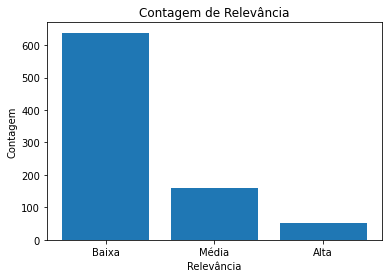

In [204]:
# GRÁFICO
import matplotlib.pyplot as plt

# Contagem das categorias na coluna "Relevância"
contagem_relevancia = df_n['Relevância'].value_counts()

# Criar o gráfico de barras
plt.bar(contagem_relevancia.index, contagem_relevancia.values)

# Adicionar título e rótulos aos eixos
plt.title('Contagem de Relevância')
plt.xlabel('Relevância')
plt.ylabel('Contagem')

# Exibir o gráfico
plt.show()

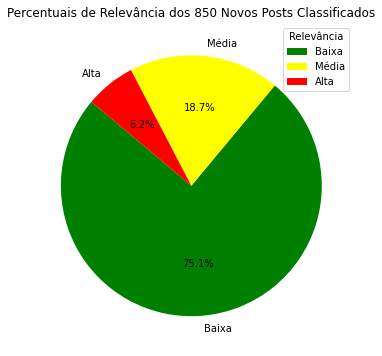

In [ ]:
# GRÁFICO DE PIZZA COM PERCENTUAIS

# Calcular os percentuais das categorias na coluna "Relevância"
percentuais_relevancia = df_n['Relevância'].value_counts(normalize=True) * 100

# Calcular o total geral
total_geral = len(df_n)

# Definir as cores para cada categoria
cores = ['green', 'yellow', 'red']

# Criar o gráfico de pizza
plt.figure(figsize=(6, 6))  # Define o tamanho da figura
plt.pie(percentuais_relevancia, labels=percentuais_relevancia.index, autopct='%.1f%%', startangle=140, colors=cores)


# Adicionar título
#plt.title('Percentuais de Relevância dos', total_geral, 'Posts Classificados')
plt.title('Percentuais de Relevância dos ' + str(total_geral) + ' Novos Posts Classificados')


# Criar uma legenda personalizada
legendas = ['Baixa', 'Média', 'Alta']
plt.legend(legendas, title="Relevância", loc="best")

# Exibir o gráfico
plt.show()

In [206]:
# Imprimir a quantidade de cada faixa
contagem_faixas = df_n['Relevância'].value_counts()
print(contagem_faixas)

Baixa    638
Média    159
Alta      53
Name: Relevância, dtype: int64
